<a href="https://colab.research.google.com/github/ribeirolucas962/Analises-de-Clusteriza-o/blob/main/clusteriza_o_pratica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importe as bibliotecas necessárias:

In [ ]:
pip install kmodes


In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.datasets import load_iris
from kmodes.kmodes import KModes

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Didatic purposes
import string
from ipywidgets import interact

##cria um dicionário

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [ ]:
x,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df= pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head

<bound method NDFrame.head of              A         B
0     7.724021  2.216624
1     2.853507 -4.360513
2     2.757104 -4.722222
3     1.942275 -2.653411
4     1.968483 -4.716844
...        ...       ...
4995  8.806303  3.275819
4996  9.184335  2.143412
4997  0.660825  7.851757
4998  9.312322  0.459469
4999  7.434893  2.809612

[5000 rows x 2 columns]>

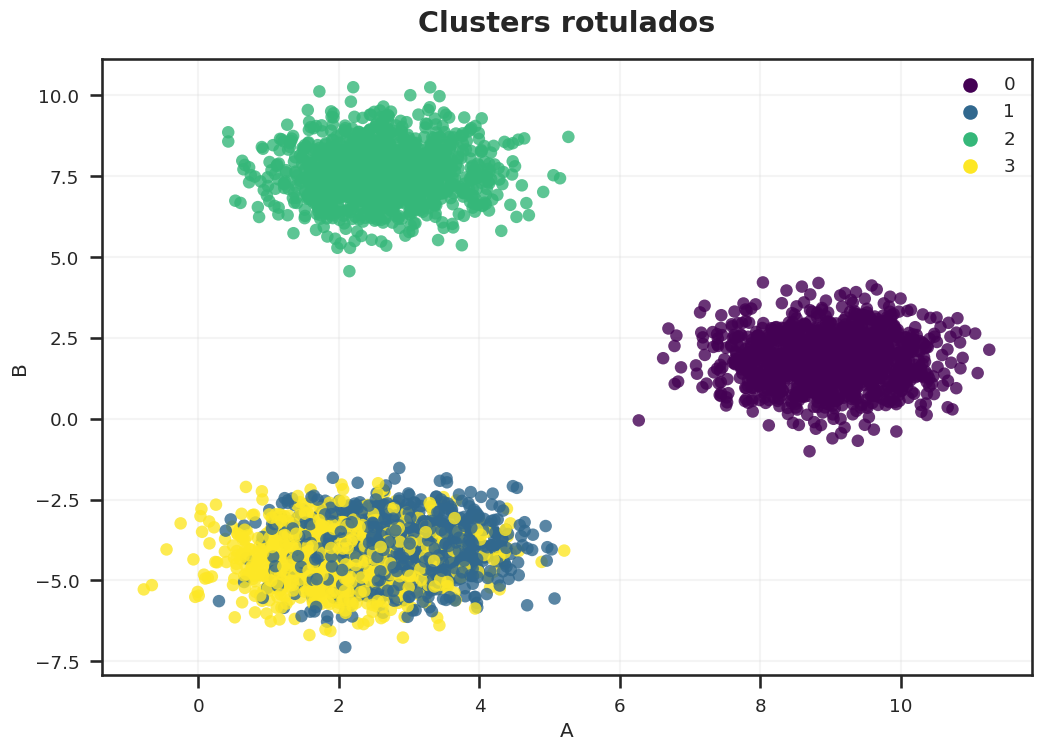

In [ ]:
 #Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Clusters rotulados')
plt.show()

In [ ]:
centroids, labels, intertia = k_means(x, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


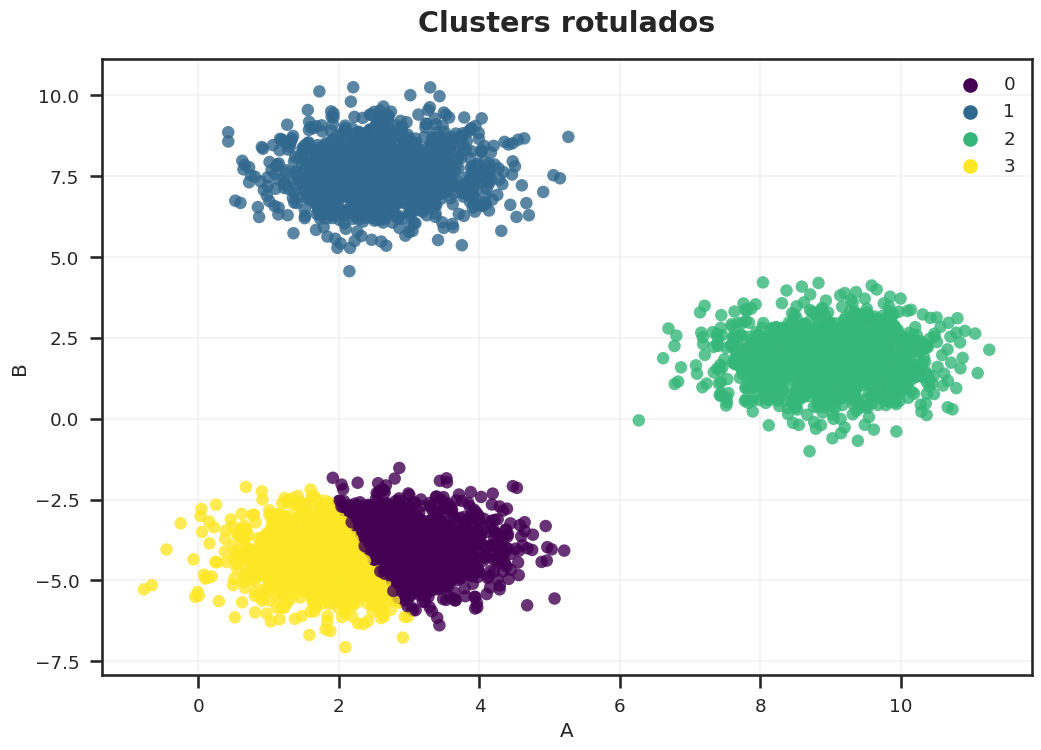

In [ ]:
# Usando função
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Clusters rotulados')
plt.show();

In [ ]:
#Usando KMeans
model = KMeans(n_clusters=4)
model.fit(x)

centroids = model.cluster_centers_
labels = model.labels_
intertia = model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


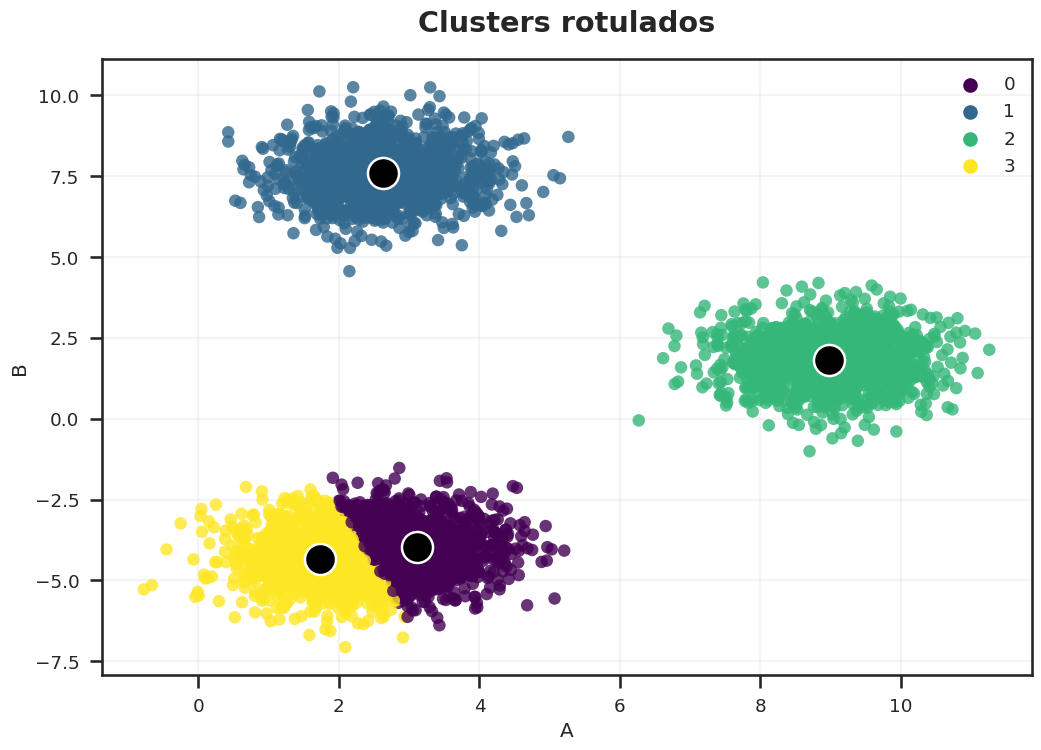

In [ ]:
ax =sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1],markers='*', s=500, color='black', ax=ax)

plt.title('Clusters rotulados')
plt.show()

In [ ]:
#sklearn metrics
silhouette_score(x, labels)
davies_bouldin_score(x, labels)
calinski_harabasz_score(x, labels)

49623.42052806164

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

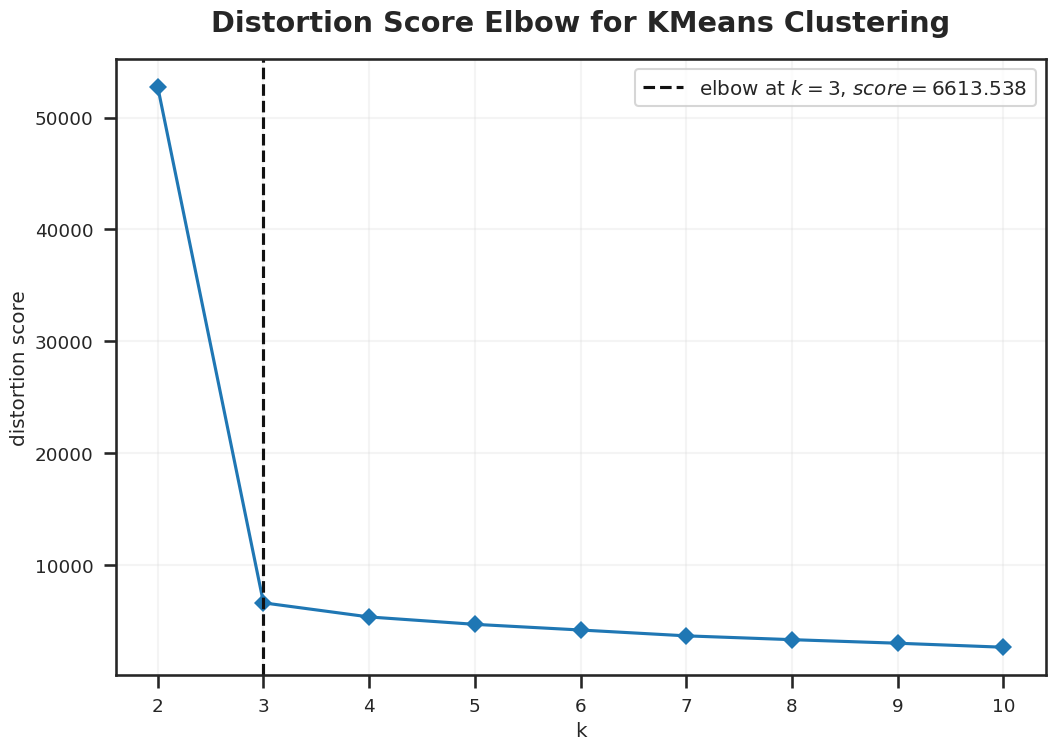

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), x, k=10, timings=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


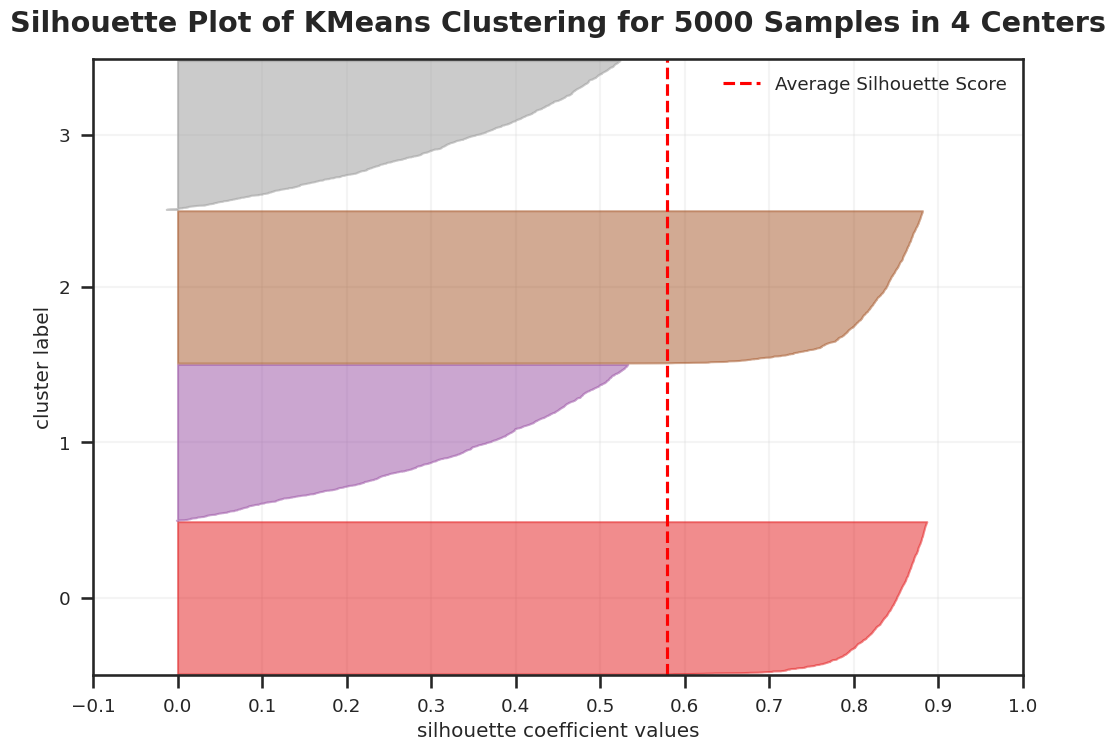

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), x)

In [ ]:

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(x)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(x, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[{'k': 2,
  'inertia': 52709.73127988192,
  'silhouette_score': 0.679166118219258,
  'davies_bouldin_score': 0.5719054332695808,
  'calinski_harabasz_score': 10630.304216773442},
 {'k': 3,
  'inertia': 6613.538140276987,
  'silhouette_score': 0.8327137624831016,
  'davies_bouldin_score': 0.23038730735399363,
  'calinski_harabasz_score': 59767.633458881726},
 {'k': 4,
  'inertia': 5351.724244749681,
  'silhouette_score': 0.5790421792813183,
  'davies_bouldin_score': 0.7000693991866193,
  'calinski_harabasz_score': 49623.420528061644},
 {'k': 5,
  'inertia': 4727.70840578159,
  'silhouette_score': 0.5755809776745843,
  'davies_bouldin_score': 0.6857383193598965,
  'calinski_harabasz_score': 42288.98255289862},
 {'k': 6,
  'inertia': 4168.9552894471835,
  'silhouette_score': 0.45053849244817573,
  'davies_bouldin_score': 0.923940017122173,
  'calinski_harabasz_score': 38492.0515788658},
 {'k': 7,
  'inertia': 3669.7897855707606,
  'silhouette_score': 0.322619772884152,
  'davies_bouldin_s

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,52709.731280,0.679166,0.571905,10630.304217
3,6613.538140,0.832714,0.230387,59767.633459
4,5351.724245,0.579042,0.700069,49623.420528
5,4727.708406,0.575581,0.685738,42288.982553
6,4168.955289,0.450538,0.923940,38492.051579
7,3669.789786,0.322620,1.121862,36546.354081
8,3321.588833,0.316912,1.075836,34675.695254
9,2971.833039,0.324528,1.014953,33979.465764
10,2650.577118,0.328371,0.953480,33928.436110


In [ ]:
# Style dataframe
(
    pd.DataFrame(cluster_metrics_results)
    .set_index('k')
    .style.background_gradient(cmap='Oranges', subset='inertia')
    .highlight_max(subset=['silhouette_score', 'calinski_harabasz_score'])
    .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,52709.731280,0.679166,0.571905,10630.304217
3,6613.538140,0.832714,0.230387,59767.633459
4,5351.724245,0.579042,0.700069,49623.420528
5,4727.708406,0.575581,0.685738,42288.982553
6,4168.955289,0.450538,0.923940,38492.051579
7,3669.789786,0.322620,1.121862,36546.354081
8,3321.588833,0.316912,1.075836,34675.695254
9,2971.833039,0.324528,1.014953,33979.465764
10,2650.577118,0.328371,0.953480,33928.436110


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

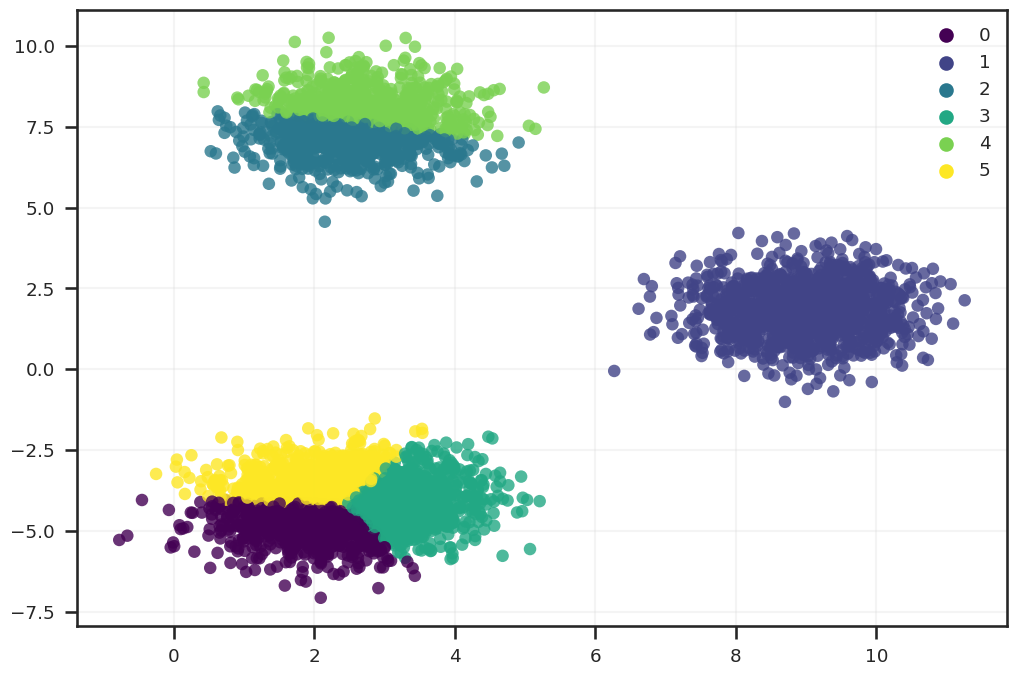

In [ ]:
@interact(k=(2,11), data=['x','x_random'])
def plot_kmeans(k, data):
  data = x if data=='x' else x_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

In [ ]:
# Simulate clusters with high dimensional data
x_dim, y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(x_dim, columns=list(string.ascii_lowercase[:x_dim.shape[1]]))
df_dim.head()

,a,b,c,d,e,f,g,h,i,j
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
# Apply PCA
pca= PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'pc{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [ ]:
# Verify explained variance
pd.DataFrame(
    {'expaind_var': pca.explained_variance_ratio_, 'explaind_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,expaind_var,explaind_var_cumsum
pc1,0.553295,0.553295
pc2,0.307542,0.860836
pc3,0.108453,0.969289
pc4,0.004899,0.974188
pc5,0.004765,0.978953
pc6,0.004509,0.983462
pc7,0.004389,0.987851
pc8,0.004282,0.992133
pc9,0.004086,0.996219
pc10,0.003781,1.000000


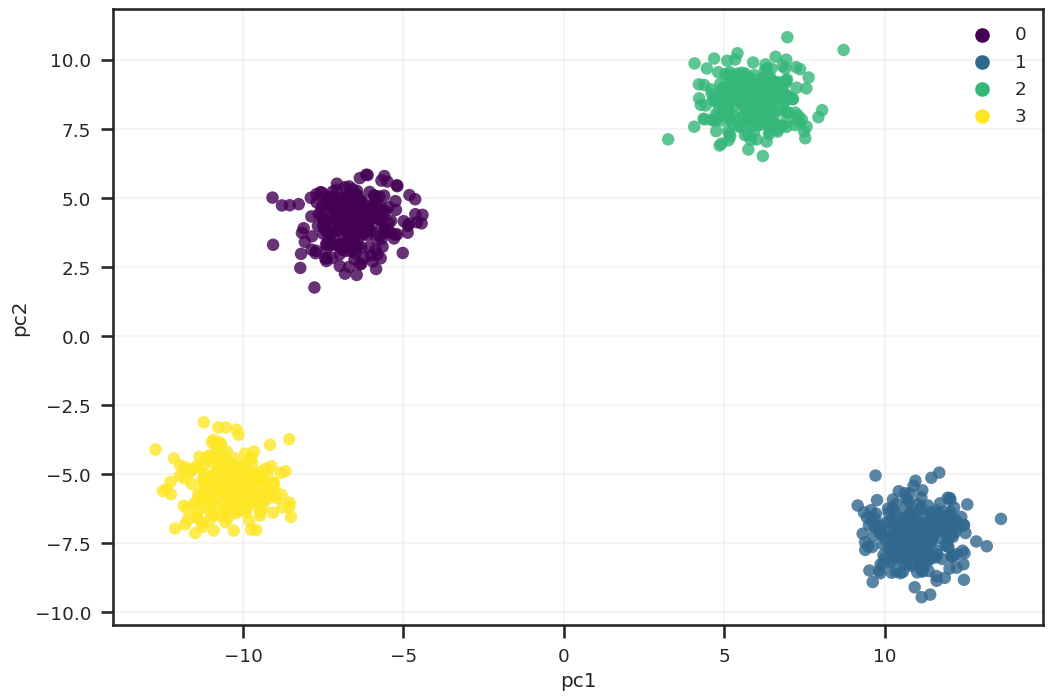

In [ ]:
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


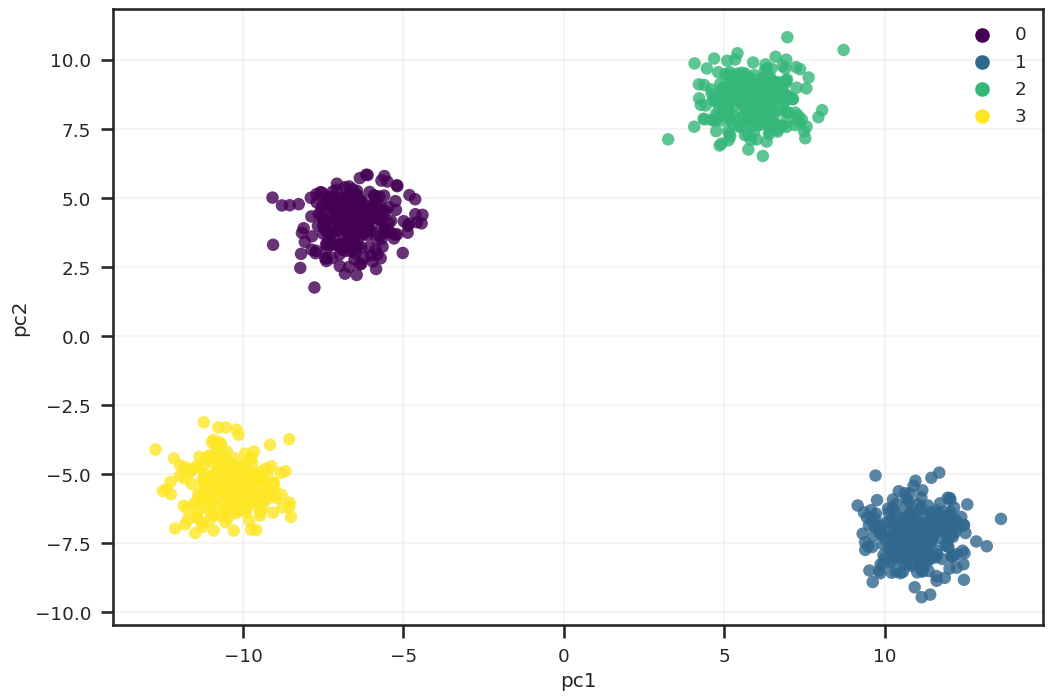

In [ ]:
# Plot PCA with k-means label

labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue=y_dim, **scatter_kwargs);


In [ ]:
# 3D PCA plot
px.scatter_3d(df_pca, x='pc1', y='pc2', z='pc3', color=labels, template='plotly_dark')

#continuação de clasterização

In [ ]:
x , y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(x, columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

,A,B
0,-1.710205,8.159010
1,-0.397014,2.109227
2,-1.148252,8.216479
3,2.334665,-0.024083
4,-1.347961,3.713714


In [ ]:
model= AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(x)

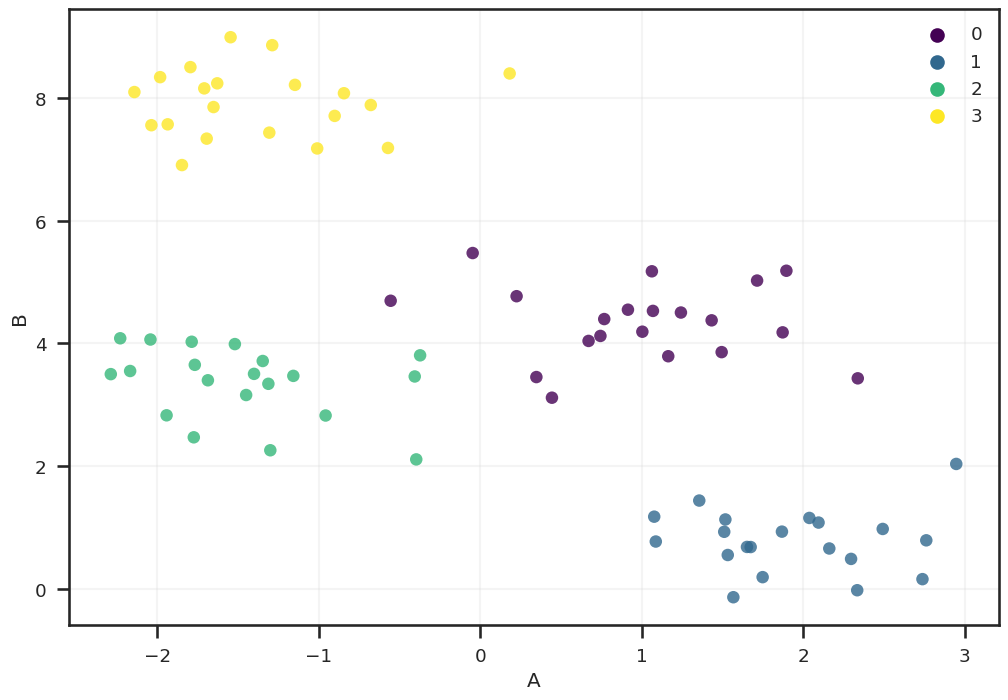

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

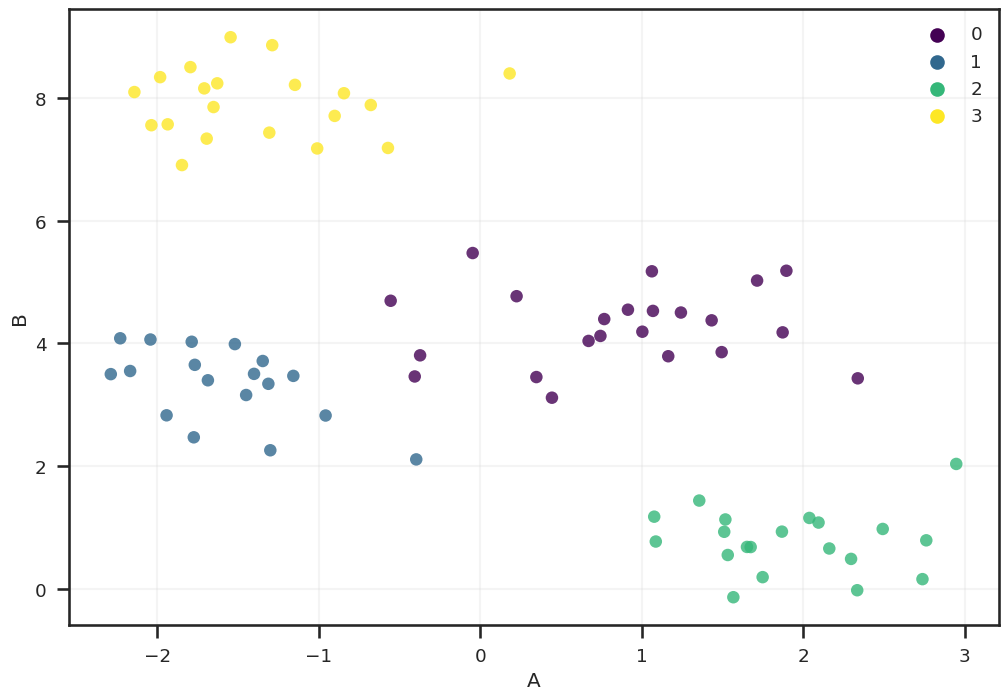

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

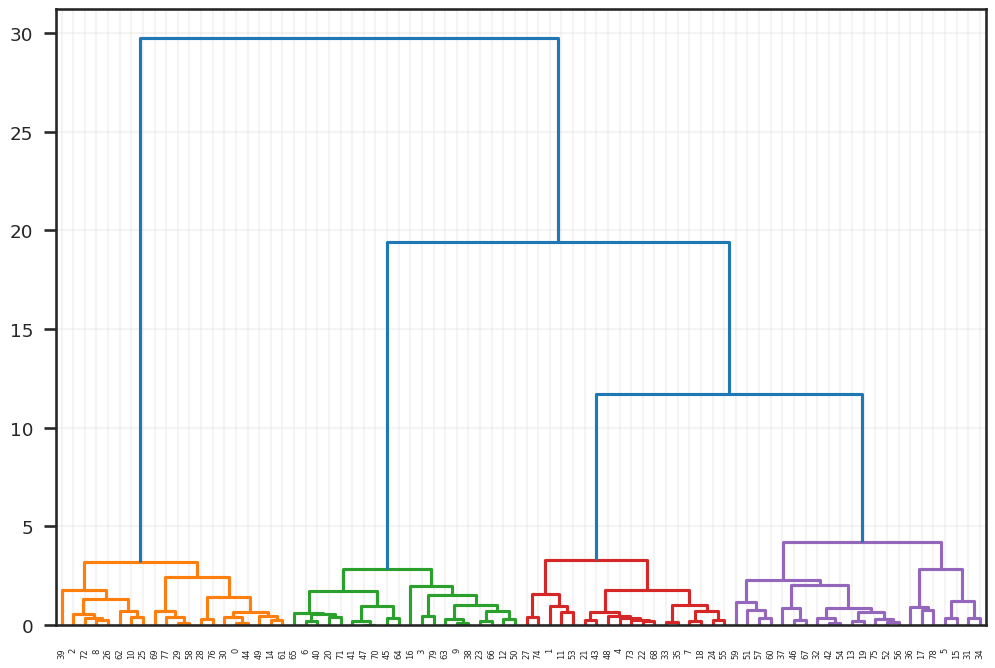

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

In [ ]:
@interact(method=['single','complete', 'centroid','ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

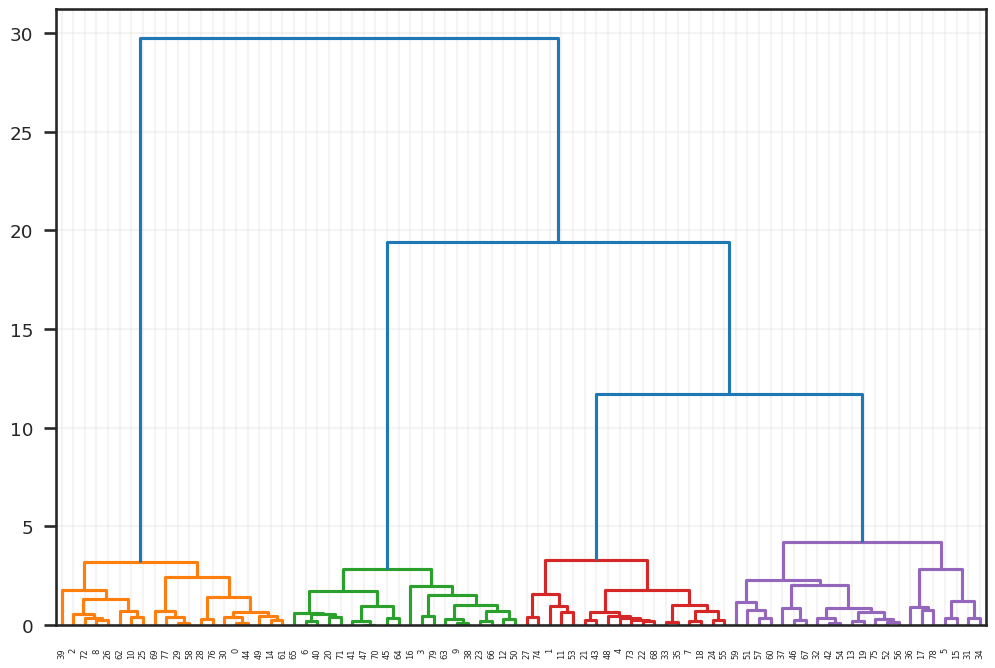

In [ ]:
linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)

In [ ]:
fcluster(Z, 4, criterion='maxclust')

array([1, 3, 1, 2, 3, 4, 2, 3, 1, 2, 1, 3, 2, 4, 1, 4, 2, 4, 3, 4, 2, 3,
       3, 2, 3, 1, 1, 3, 1, 1, 1, 4, 4, 3, 4, 3, 4, 4, 2, 1, 2, 2, 4, 3,
       1, 2, 4, 2, 3, 1, 2, 4, 4, 3, 4, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 2,
       2, 4, 3, 1, 2, 2, 1, 3, 3, 4, 1, 1, 4, 2], dtype=int32)

interactive(children=(Dropdown(description='method', options=('single', 'complete', 'centroid', 'ward'), value…

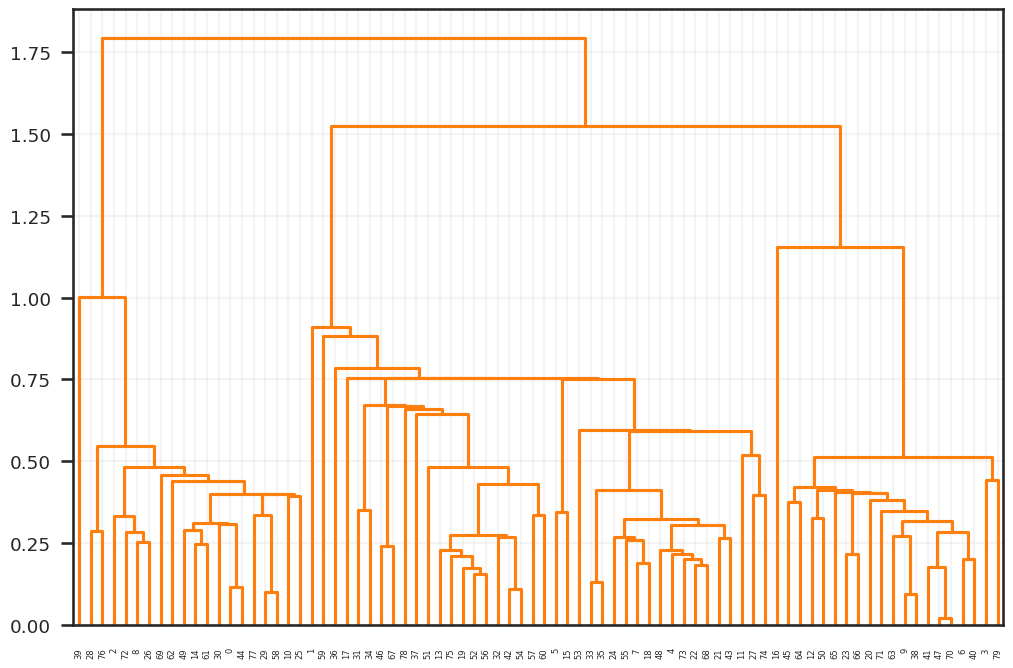

In [ ]:
@interact(method=['single','complete', 'centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z, color_threshold=10)
  plt.show

DBSCAN

In [ ]:
x,y =datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=8, random_state=0)
df = pd.DataFrame(x,columns=list(string.ascii_uppercase[:x.shape[1]]))
df.head()

,A,B
0,1.492551,7.280023
1,-14.145700,1.470599
2,4.179590,10.043441
3,9.279975,-23.161834
4,1.037210,11.398705


In [ ]:
model = DBSCAN()
labels = model.fit_predict(x)

In [ ]:
labels = dbscan(x)[1]


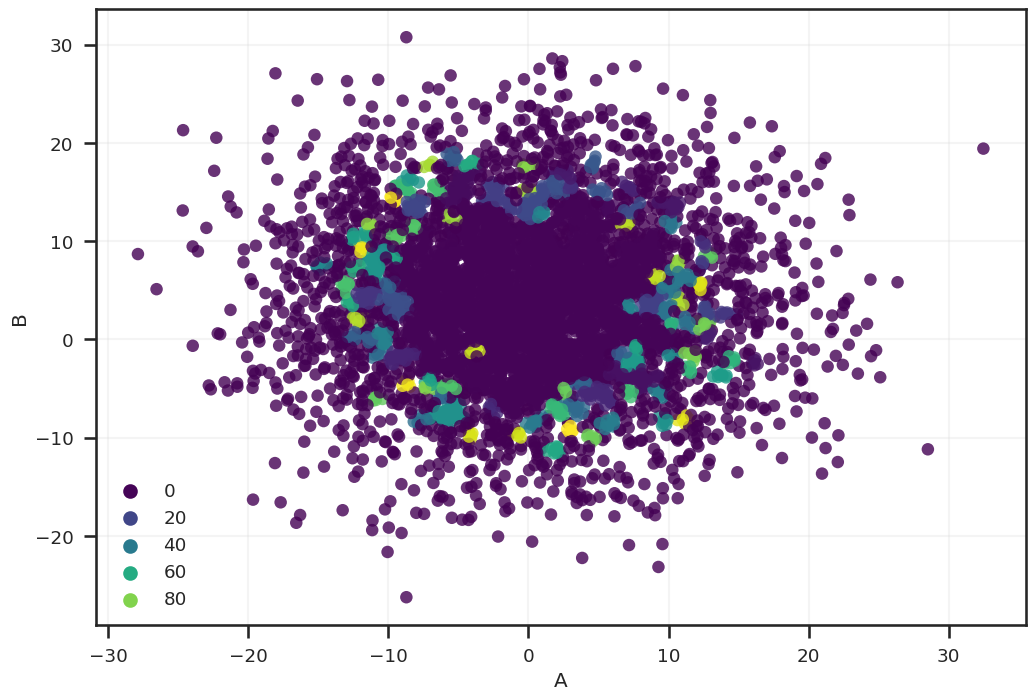

In [ ]:
sns.scatterplot(data=df, x='A', y="B", hue=labels, **scatter_kwargs);

In [ ]:
@interact(eps=(0.01,1, 0.01),min_samples=(1,20))
def custom_dbscam(eps, min_samples):
  _, labels = dbscan(x, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x="A", y='B', hue=labels, palette='tab10')
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

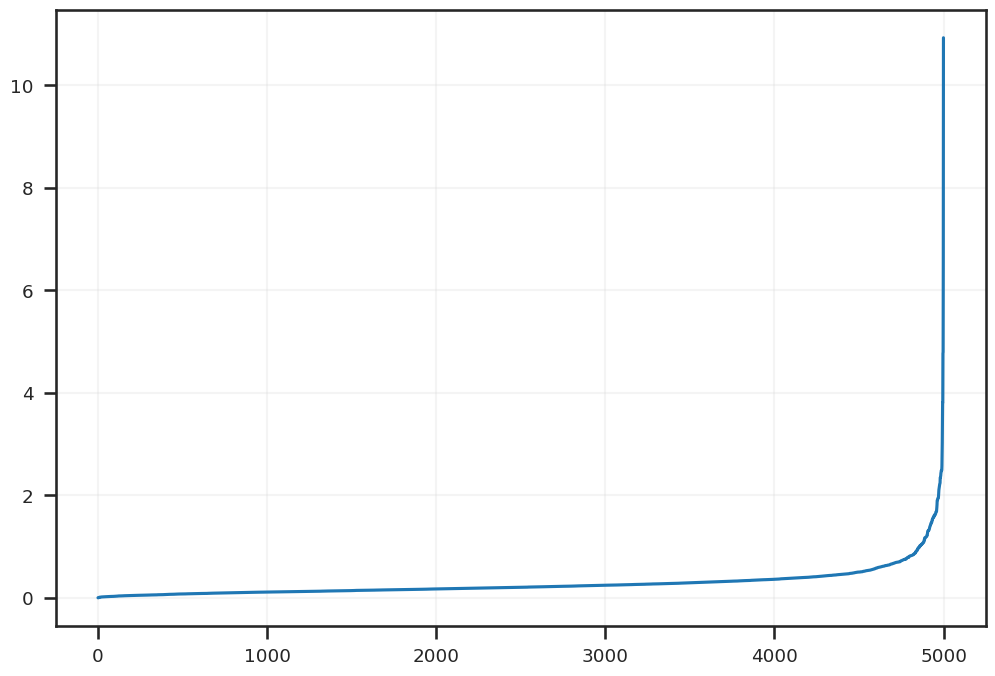

In [ ]:
from sklearn.neighbors import  NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(x)
distances, indices = nn_model.kneighbors(x)
deistances = np.sort(distances, axis=0)
plt.plot(deistances[:,1])
plt.show()